In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
import sys
sys.path.append("../../")

from spotlob.tests.image_generation import binary_line

In [3]:
from spotlob.calculation import points_within_contours

In [4]:
im,w = binary_line((100,0), (100,10), 8, shape=(500,1000))

_, contours, _ = cv2.findContours(im, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

pts = points_within_contours(contours)

In [5]:
im_J, im_I = np.indices(im.shape)
im_mask = im.astype(bool)
original_pts = np.vstack([im_I[im_mask], im_J[im_mask]]).T

In [6]:
%matplotlib notebook

<IPython.core.display.Javascript object>


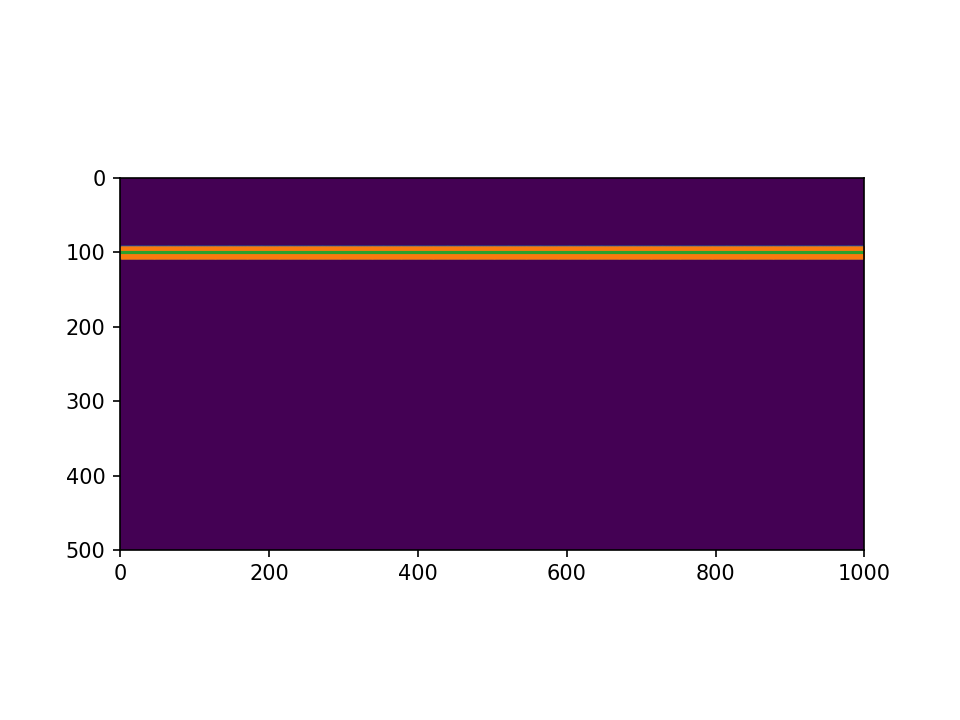

In [7]:
plt.figure()
plt.imshow(im)
plt.plot(pts[:,0],pts[:,1], linestyle="", marker=".", alpha=0.2)
plt.plot(original_pts[:,0]+0.2,original_pts[:,1]+0.2, linestyle="", marker=".", alpha=0.2)

In [8]:
im2 = np.zeros(im.shape)
[vx,vy,x,y] = cv2.fitLine(pts,cv2.DIST_FAIR,0,0.01,0.01)

# Now find two extreme points on the line to draw line
lefty = int((-x*vy/vx) + y)
righty = int(((im.shape[1]-x)*vy/vx)+y)

#Finally draw the line
#cv2.line(im2,(im.shape[1]-1,righty),(0,lefty),255,1)

print(lefty,righty)
plt.plot((0, im.shape[1]), (lefty,righty))
plt.imshow(im2)

99 99


In [9]:
pts[:,0]

array([  0,   1,   2, ..., 996, 997, 998])

In [10]:
from spotlob.calculation import distance_point_to_line

In [11]:
p1 = (0, lefty)
p2 = (im.shape[1], righty)

inner_points_x = pts[:, 1]
inner_points_y = pts[:, 0]

distances = distance_point_to_line(inner_points_y,
                                   inner_points_x,
                                   p1,
                                   p2)

<IPython.core.display.Javascript object>


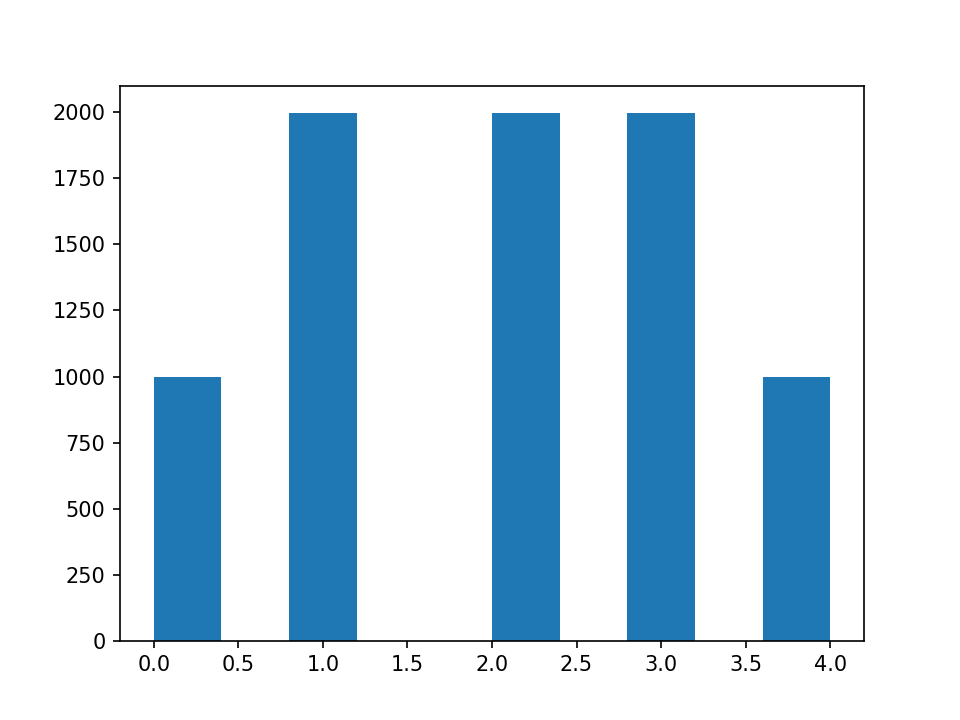

In [12]:
plt.figure()
plt.hist(distances)
plt.show()

In [13]:
np.percentile(distances, 100)*2

8.0